# Is Fandango Still Inflating Ratings?

In [a popular article](https://fivethirtyeight.com/features/fandango-movies-ratings/) from October 2015, Walt Hickey, a writer at FiveThirtyEight, showed strong evidence that suggested Fandango's movie rating system might not be fair and truthful. 

![img](fandango1.jpg)

In this project, we'll check more recent movie rating information to find out if Fandango has adjusted how they rate movies since Hickey investigated.

## Discover the Data

We will use two sets of movie ratings: [one](https://github.com/fivethirtyeight/data/tree/master/fandango) was gathered before Hickey's study, and [the other](https://github.com/mircealex/Movie_ratings_2016_17) was gathered after. First, we'll import these two sets and take a look at how they're organized.

In [4]:
import pandas as pd
previous = pd.read_csv('./Downloads/Fandango Ratings/fandango_score_comparison.csv')
after = pd.read_csv('./Downloads/Fandango Ratings/movie_ratings_16_17.csv')
pd.options.display.max_columns = 100

previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [5]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


Now we extract only the columns containing Fandango-related information, ensuring the pertinent data is easily accessible for future use. To prevent any potential `SettingWithCopyWarning`, we'll generate duplicates.

In [7]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [8]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


Our aim is to assess if Fandango's rating system changed post Hickey's analysis. Our focus includes all movie ratings on Fandango's site, regardless of release year. To compare before and after Hickey's analysis, we'll sample the population twice.

Hickey's criteria: 
 - 30+ fan ratings on website when sampling;
 - released in 2015 movie release.

Our second sample criteria: 
 - substantial votes/reviews;
 - released in 2016 or later.

Both these authors had specific research questions when they collected the data, and they chose certain criteria to create a sample that matched their questions. This way of sampling is known as [**purposive sampling**](https://www.scribbr.com/methodology/purposive-sampling/#:~:text=Purposive%20sampling%20refers%20to%20a,on%20purpose%E2%80%9D%20in%20purposive%20sampling.) (or judgmental sampling). While this approach worked well for their studies, it might not be very helpful for our purpose.

## Redefine our Goal of Analysis

At this point, we face two options: 
1. gather fresh data;
2. modify our analysis objective. 

We opt for the latter and set certain boundaries on our original aim. Rather than aiming to identify alterations in Fandango's rating system post Hickey's analysis, our revised goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 

This adjusted objective serves as a reasonable substitute for our initial intent.

In [11]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Upon examining the two datasets, you'll observe movies with release years other than 2015 or 2016. To suit our objectives, we should focus solely on movies released in 2015 and 2016.

Beginning with Hickey's dataset, our initial step involves isolating movies released in 2015. Although no distinct column exists for release year, we can likely extract this information from the text in the `FILM` column.

In [13]:
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [14]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [16]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [18]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

We isolated the movies released in 2015. Now let's isolate the movies of 2016 in the other dataset.

In [19]:
fandango_after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [20]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [21]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes

We'll initiate by contrasting the forms of the two distributions through kernel density plots, adopting the [FiveThirtyEight](https://www.dataquest.io/blog/making-538-plots/) style for visualization.

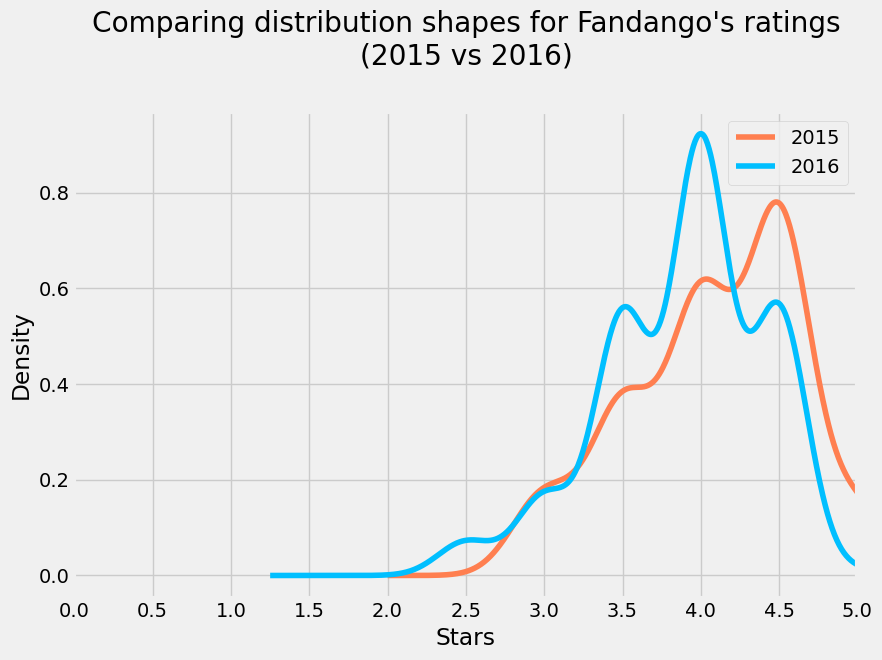

In [47]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (9,6), color = 'coral')


fandango_2016['fandango'].plot.kde(label = '2016', legend = True, color = 'deepskyblue')
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)", y = 1.08)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,0.5))
plt.show()

The figure above reveals two notable observations:

1. Both distributions exhibit a pronounced left-skew.
2. The 2016 distribution displays a slight leftward shift when compared to the 2015 distribution.

The left skew indicates that Fandango tends to give very high fan ratings. Fandango's ticket selling involvement making the high ratings a bit questionable.

The slight shift left in the 2016 distribution is quite important. It indicates slightly lower ratings in 2016 than in 2015, pointing to a distinct change in Fandango's ratings for popular movies between the two years. The direction of this change is evident: 2016 ratings were lower than those in 2015.

## Relative Frequencies Comparation

For granular infomation, we need to compare the frequency tables of the two distributions to analyze more data.

In [38]:
print('2015' + '\n' + '-' * 16)

#normalize the tables and show percentages
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100 

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [39]:
print('2016' + '\n' + '-' * 16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Here are the observations after comparing the two frequency distributions:

**Decrease in Very High Ratings in 2016:**

 - Very high ratings (4.5 and 5 stars) had notably lower percentages in 2016 compared to 2015.
 - In 2016, fewer than 1% of movies achieved a perfect rating of 5 stars, whereas in 2015, this figure was close to 7%.
 - Movies with ratings of 4.5 were more common in 2015, with about 13% more films having this rating compared to 2016.

**Lower Minimum Rating in 2016:**

 - The minimum rating dropped to 2.5 stars in 2016, down from 3 stars in 2015, indicating a clear difference in the two distributions.
 
**Increase in Certain Ratings in 2016:**

 - Ratings of 3.5 and 4 stars were more prevalent in 2016 compared to 2015.

These changes highlight a trend of shifting movie ratings over the two years.

## Assessing the Direction of the Shift

To gain a clearer understanding of the change's trend, we'll examine a few key summary metrics. In the upcoming analysis, we will calculate the mean, median, and mode for both sets of data. Subsequently, we'll represent these values using a bar graph.

In [42]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


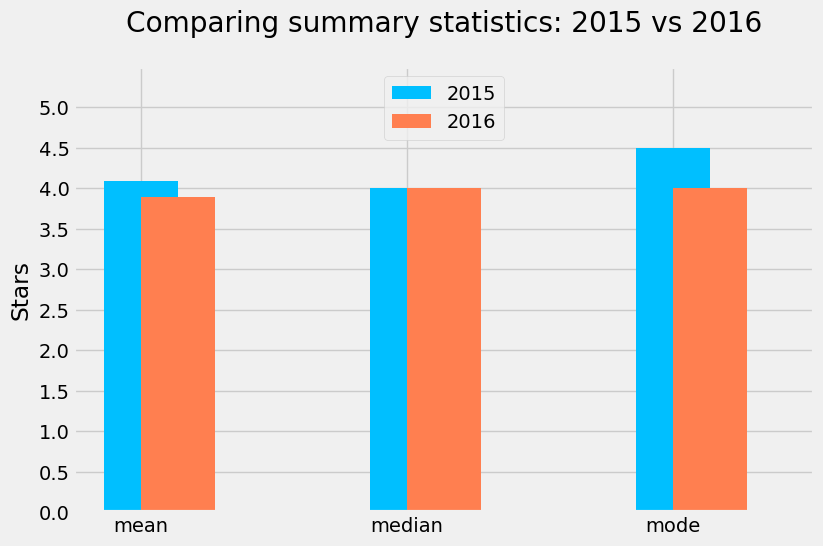

In [68]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'deepskyblue', align = 'center', label = '2015', legend = True, width = 0.28)
summary['2016'].plot.bar(color = 'coral', align = 'edge', label = '2016', legend = True, width = 0.28, rot = 0, figsize = (8.5,5.5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.06)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.5,.5))
plt.ylabel('Stars')
plt.legend(loc = 'upper center')
plt.show()

The average rating in 2016 experienced a reduction of around 0.2 compared to the previous year. This corresponds to a decline of nearly 5% relative to the mean rating recorded in 2015.

In [69]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

Although the median remains consistent in both datasets, the mode registers a decrease of 0.5 in 2016. This observation, in conjunction with our findings regarding the mean, substantiates the trend indicated by the kernel density plot: generally, well-received movies from 2016 attained slightly lower ratings in comparison to those released in 2015.

## Conclusion

Our investigation has brought to light a distinct contrast in the ratings given by Fandango to popular films during the years 2015 and 2016. Our findings indicate that popular movies released in 2016, on average, received less favorable ratings on Fandango when compared to their equivalents from 2015.

This change is most likely connected to Fandango efforts to address the skewed rating and fix the biased rating system following Hickey's article.